### What is Outlier Dectection?

Outlier detection is a way of figuring out data points that do not follow an established pattern. Once we observe a pattern in our data that represence normal bahaviour, then it is easy to flag the points that do not conform to this pattern as being anomalies or generated by different underleing mechanism. This turns out to be very important in number of fields, such as in medicine, drug discovery and scurity such as faud detection. In this blog post we will examine how to build a simple outlier detection algorithm.

<img src='Outlier1.png'></img>

In the plot above, we can see that most of the data are clustered together we and few are scattered far away from the cluster center. From an outlier detection perspective, we can assume that the points in the center, which represents majority of the data,  are normal whiles those far away noisy data, and hence we can label them as anomalies. This is the bases of outlier detectors.

Lets recall what we learn from the first blog post. We show that the gaussian distribution has a bell-shaped curve like the one below. 

<img src='outlier.png'><img>

From this curve, we can see that points that are far from the mean have low probabilties(are less common) while points close to the center have high probabilities(more common). The function that estimates this probabilities called is probability density function is given as:  $$\large{P(x) = \frac{1}{\sqrt{2\pi}\sigma} exp\displaystyle\{ {-\frac{(x - \mu)^2}{2\sigma^2}}} \}$$ 

Therefore if we know that our data has Gaussian noise we can simply estimate a probility density function $P(x)$ of the data. Using an appropriate threshold, say $\mu$, we can determine anomalies/normal data points if they are below/above the threshold. 

$$f(x)  = \left\{\begin{array}{cr}
			0 & \text{if } P(x) \leq  \mu\\[0.3cm]
			1 & \text{if } P(x) > \mu\\
		\end{array} \right.$$

We can extend this idea if we have n number of features by assumming independence and writting out the joint probability density function as follows:
    $$\large{P(x_1, x_2, \cdots , x_n) =  \prod_{i = 1}^{n}  \frac{1}{\sqrt{2\pi}\sigma_i} exp \displaystyle\{ {-\frac{(x_i - \mu_i)^2}{2\sigma_i^2}}} \}$$

We can apply this algorithm that we just found to the data in the first plot to do outlier detection. Let's make joint plot to show that the features in this data are gaussian.

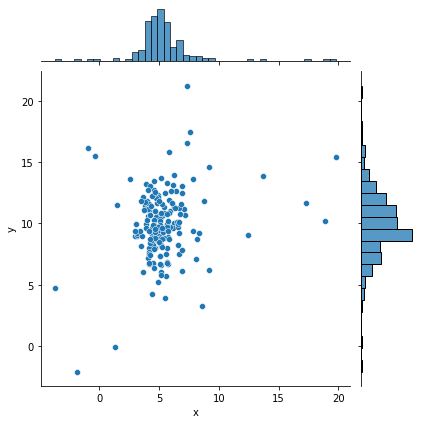

In [2]:
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns

import pandas as pd


data = pd.read_csv('Outlier_example4.csv')
_=sns.jointplot(x='x', y='y', data=data)

On this plot, we can see the marginal density plots for each of our the features, and both of them are Gaussian. We can then proceed to implement our simple outlier detector.

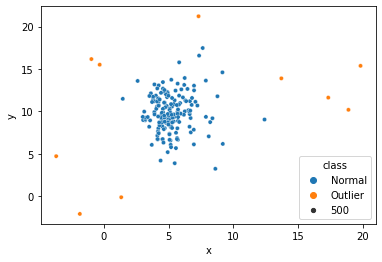

In [6]:
def pdf(x, u, s):
    p1 = 1/(np.sqrt(2*np.pi)*s)
    p2 = - ((x - u)**2)/(2*s**2)
    return p1*np.e**p2


threshold = 0.00035
data['class'] = None
x_mean = data.x.mean()
x_std = data.x.std()
y_mean = data.y.mean()
y_std = data.y.std()

for index, row in data.iterrows():
    x = row['x']
    y = row['y']
    value = pdf(x, x_mean, x_std)*pdf(y, y_mean, y_std)
    #print(value)
    outcome = ''
    if value < threshold:
        outcome = 'Outlier'
    else:
        outcome = 'Normal'   
    data.at[index, 'class'] = outcome

g=sns.scatterplot(x='x', y='y',data=data, hue='class', size=500)


You can see the outcome of running our simple detection algorithm. Most of the farthest points have been flag (orange) for being anomalies and that is what we expected. 

# Conclusion

In this blog post, we have learned how to build a simple outlier detection algorithm and applied it to real data. Sklearns implementation is more advance than this our algorithm but the underlying idea remains the same. 